<a href="https://colab.research.google.com/github/jyd1222/JSC270_A4_NLP/blob/main/Assignment_4_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re

Below are some custom functions used throughout the assignment.

In [3]:
def remove_URLs(obs: list) -> list:
  """Remove all URL tokens from the tokenized observation."""
  return [re.sub("^http.*$", "", token) for token in obs]

In [4]:
def remove_punct(obs: list) -> list:
  """Remove all punctuation and special characters from each token of the observation."""
  return [re.sub("[^\w\s]", "", token) for token in obs]

In [5]:
def to_lower(obs: list) -> list:
  """Convert all uppercase characters to lowercase for each token of the observation."""
  return [str.lower(token) for token in obs]

In [6]:
def stem(obs: list) -> list:
  """Stem each token of the observation using the Porter stemming algorithm."""
  stemmer = PorterStemmer()
  return [stemmer.stem(token) for token in obs]

In [7]:
nltk.download("wordnet")


def lemmatize(obs: list) -> list:
  """Lemmatize each token of the observation using WordNet's morphy function."""
  lemmatizer = WordNetLemmatizer()
  return [lemmatizer.lemmatize(token) for token in obs]

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [8]:
nltk.download("stopwords")
sw = stopwords.words("english")


def remove_stopwords(obs: list, n: int=100) -> list:
  """Remove stopwords from each token of the observation."""
  return [token for token in obs if token not in sw[0:n]]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
def count_vectorize(data: pd.Series, max_features: int=1000) -> tuple:
  """
  Vectorize the observation data using CountVectorizer.
  Return:
  * X: an n x d matrix where n is the number of observations and d is the number of features (tokens)
  * features: a vector with all feature (token) names
  """
  vectorizer = CountVectorizer(max_features=max_features)
  data_str = pd.Series([" ".join(obs) for obs in data])
  X = vectorizer.fit_transform(data_str).toarray()
  features = vectorizer.get_feature_names_out()
  return X, features

In [10]:
def tfidf_vectorize(data: pd.Series, max_features: int=1000) -> tuple:
  """
  Vectorize the observation data using CountVectorizer and transform it with TfidfTransformer.
  Return:
  * X: an n x d matrix where n is the number of observations and d is the number of features (tokens)
  * features: a vector with all feature (token) names
  """
  X, features = count_vectorize(data, max_features)
  transformer = TfidfTransformer()
  X = transformer.fit_transform(X).toarray()
  return X, features

In [11]:
def naive_bayes(matrix: np.ndarray, labels: pd.Series) -> MultinomialNB:
  """Fit a Naive Bayes model using the matrix and labels."""
  nb_multinomial = MultinomialNB()
  nb_multinomial.fit(matrix, labels)
  return nb_multinomial

# <u>**Part I: Sentiment Analysis with a Twitter Dataset**</u>

In [12]:
# Read the data from GitHub
train_data = pd.read_csv("https://raw.githubusercontent.com/RobinEatingWorm/JSC270H1_HW4_Data/main/Corona_NLP_train.csv", encoding_errors="replace")
test_data = pd.read_csv("https://raw.githubusercontent.com/RobinEatingWorm/JSC270H1_HW4_Data/main/Corona_NLP_test.csv", encoding_errors="replace")

In [13]:

def label(sentiment: str) -> int:
  """Return a numerical label for the given sentiment."""
  if sentiment in ("Negative", "Extremely Negative"):
    return 0
  elif sentiment == "Neutral":
    return 1
  elif sentiment in ("Positive", "Extremely Positive"):
    return 2

In [14]:
# Add the labels to the data frames as specfied in the Assignment 4 instructions
train_data["Label"] = train_data["Sentiment"].apply(label)
test_data["Label"] = test_data["Sentiment"].apply(label)

## **A**)

In [15]:
n = train_data.shape[0]
prop_neg = train_data[train_data["Label"] == 0].shape[0] / n
prop_neu = train_data[train_data["Label"] == 1].shape[0] / n
prop_pos = train_data[train_data["Label"] == 2].shape[0] / n
print(f"Proportion of Negative Tweets: {prop_neg}")
print(f"Proportion of Neutral Tweets:  {prop_neu}")
print(f"Proportion of Positive Tweets: {prop_pos}")

Proportion of Negative Tweets: 0.37412833782831595
Proportion of Neutral Tweets:  0.18740432976164442
Proportion of Positive Tweets: 0.4384673324100396


## **B**)

In [16]:
# Add a column of tokenized observations to both data frames
train_data["TokenizedTweet"] = train_data["OriginalTweet"].apply(str.split)
test_data["TokenizedTweet"] = test_data["OriginalTweet"].apply(str.split)

## **C**)

In [17]:
# Add a column of tokenized observations with URLs removed to both data frames
train_data["TokenizedTweetNoURL"] = train_data["TokenizedTweet"].apply(remove_URLs)
test_data["TokenizedTweetNoURL"] = test_data["TokenizedTweet"].apply(remove_URLs)

## **D**)

In [18]:
# Add a column of tokenized observations with all punctuation and special characters removed
# and all uppercase characters converted to lowercase to both data frames
train_data["TokenizedTweetLowerNoPunct"] = train_data["TokenizedTweetNoURL"].apply(remove_punct).apply(to_lower)
test_data["TokenizedTweetLowerNoPunct"] = test_data["TokenizedTweetNoURL"].apply(remove_punct).apply(to_lower)

## **E**)

In [19]:
# Add a column of stemmed tokenized observations
train_data["TokenizedTweetStem"] = train_data["TokenizedTweetLowerNoPunct"].apply(stem)
test_data["TokenizedTweetStem"] = test_data["TokenizedTweetLowerNoPunct"].apply(stem)

## **F**)

In [20]:
# Add a column of tokenized observations without stopwords
train_data["TokenizedTweetStemNoStopword"] = train_data["TokenizedTweetStem"].apply(remove_stopwords)
test_data["TokenizedTweetStemNoStopword"] = test_data["TokenizedTweetStem"].apply(remove_stopwords)

## **G**)

In [21]:
# Get the labels from both data frames
train_labels = train_data["Label"]
test_labels = test_data["Label"]

In [22]:
# Get the observations from both data frames
train_obs_stem = train_data["TokenizedTweetStemNoStopword"]
test_obs_stem = test_data["TokenizedTweetStemNoStopword"]

In [23]:
# Vectorize the observation lists into matrices of token counts for each observation
train_matrix_1, train_features_1 = count_vectorize(train_obs_stem)
test_matrix_1, test_features_1 = count_vectorize(test_obs_stem)

In [24]:
# Find the length of the vocabulary
print(f"Length of Vocabulary: {train_features_1.shape[0]}")

Length of Vocabulary: 1000


## **H**)

In [25]:
# Fit a Naive Bayes model to the training data
nb_model_1 = naive_bayes(train_matrix_1, train_labels)

In [26]:
def reshape_test_matrix(test_matrix: np.ndarray, test_features: np.ndarray,
                        train_matrix: np.ndarray, train_features: np.ndarray) -> np.ndarray:
  """
  Return the test matrix with columns corresponding to the train features.
  Any test features that are not a train feature are dropped because they are
  not defined in the Naive Bayes model.
  Return: an n x d matrix where n is the number of test observations and d is the number of train features (tokens)
  """
  num_test_obs = test_matrix.shape[0]
  num_train_features = train_features.shape[0]
  test_matrix_reshape = np.zeros((num_test_obs, num_train_features))
  # Add columns from the original test matrix to the new test matrix based on train features
  for i in range(num_train_features):
    if train_features[i] in test_features:
      j = np.where(test_features == train_features[i])[0][0]
      test_matrix_reshape[:, i] = test_matrix[:, j]
  return test_matrix_reshape

In [27]:
# Get the accuracy of the training data
train_preds_1 = nb_model_1.predict(train_matrix_1)
train_acc_1 = accuracy_score(train_preds_1, train_labels)
print(f"Training Accuracy: {train_acc_1}")

# Reshape the test matrix so that its columns correspond to the train features
test_matrix_reshape_1 = reshape_test_matrix(test_matrix_1, test_features_1, train_matrix_1, train_features_1)

# Get the accuracy of the test data
test_preds_1 = nb_model_1.predict(test_matrix_reshape_1)
test_acc_1 = accuracy_score(test_preds_1, test_labels)
print(f"Test Accuracy:     {test_acc_1}")

Training Accuracy: 0.682216876837476
Test Accuracy:     0.665086887835703


In [28]:
def get_most_probable_tokens(label: int, k: int, matrix: np.ndarray, features: np.ndarray, labels: pd.Series) -> list:
  """
  Get the k most probable tokens for the label.
  Return: a list containing k tuples with the most probable tokens and their frequencies
  """
  num_features = features.shape[0]
  num_obs = matrix.shape[0]
  # Get the frequencies of each token
  freq = np.zeros(num_features)
  for i in range(num_obs):
    if labels[i] == label:
      freq += matrix[i]
  # Get the tokens with the highest frequencies
  tokens = []
  tokens_freq = []
  kth_max = 0
  for i in range(num_features):
    if len(tokens) < k:
      tokens.append(features[i])
      tokens_freq.append(freq[i])
    elif freq[i] > kth_max:
      index_min = tokens_freq.index(kth_max)
      tokens.pop(index_min)
      tokens_freq.pop(index_min)
      tokens.append(features[i])
      tokens_freq.append(freq[i])
    kth_max = min(tokens_freq)
  return sorted(list(zip(tokens, tokens_freq)), key=lambda t: t[1], reverse=True)

In [29]:
# Get the most probable tokens for each class
tok_neg_1 = get_most_probable_tokens(0, 5, train_matrix_1, train_features_1, train_labels)
tok_neu_1 = get_most_probable_tokens(1, 5, train_matrix_1, train_features_1, train_labels)
tok_pos_1 = get_most_probable_tokens(2, 5, train_matrix_1, train_features_1, train_labels)
print(f"Most Probable Negative Words: {tok_neg_1}")
print(f"Most Probable Neutral Words:  {tok_neu_1}")
print(f"Most Probable Positive Words: {tok_pos_1}")

Most Probable Negative Words: [('coronaviru', 6716.0), ('covid19', 4890.0), ('price', 4344.0), ('food', 3638.0), ('thi', 3211.0)]
Most Probable Neutral Words:  [('coronaviru', 3804.0), ('covid19', 2759.0), ('store', 1584.0), ('supermarket', 1440.0), ('price', 1366.0)]
Most Probable Positive Words: [('coronaviru', 7492.0), ('covid19', 6027.0), ('store', 3907.0), ('thi', 3788.0), ('price', 3335.0)]


## **J**)

In [30]:
# Vectorize the observation lists into matrices of TF-IDF features for each observation
train_matrix_2, train_features_2 = tfidf_vectorize(train_obs_stem)
test_matrix_2, test_features_2 = tfidf_vectorize(test_obs_stem)

In [31]:
# Find the length of the vocabulary
print(f"Length of Vocabulary: {train_features_2.shape[0]}")

Length of Vocabulary: 1000


In [32]:
# Fit a Naive Bayes model to the training data
nb_model_2 = naive_bayes(train_matrix_2, train_labels)

In [33]:
# Get the accuracy of the training data
train_preds_2 = nb_model_2.predict(train_matrix_2)
train_acc_2 = accuracy_score(train_preds_2, train_labels)
print(f"Training Accuracy: {train_acc_2}")

# Reshape the test matrix so that its columns correspond to the train features
test_matrix_reshape_2 = reshape_test_matrix(test_matrix_2, test_features_2, train_matrix_2, train_features_2)

# Get the accuracy of the test data
test_preds_2 = nb_model_2.predict(test_matrix_reshape_2)
test_acc_2 = accuracy_score(test_preds_2, test_labels)
print(f"Test Accuracy:     {test_acc_2}")

Training Accuracy: 0.6647471875987074
Test Accuracy:     0.6477093206951027


In [34]:
# Get the most probable tokens for each class
tok_neg_2 = get_most_probable_tokens(0, 5, train_matrix_2, train_features_2, train_labels)
tok_neu_2 = get_most_probable_tokens(1, 5, train_matrix_2, train_features_2, train_labels)
tok_pos_2 = get_most_probable_tokens(2, 5, train_matrix_2, train_features_2, train_labels)
print(f"Most Probable Negative Words: {tok_neg_2}")
print(f"Most Probable Neutral Words:  {tok_neu_2}")
print(f"Most Probable Positive Words: {tok_pos_2}")

Most Probable Negative Words: [('coronaviru', 722.824370279054), ('price', 622.0772912390055), ('covid19', 594.4881639347398), ('food', 539.2401118251898), ('supermarket', 447.4176231814674)]
Most Probable Neutral Words:  [('coronaviru', 527.257403859127), ('covid19', 427.8610245169695), ('store', 294.38494637918046), ('supermarket', 280.10558073781567), ('groceri', 255.4045256983958)]
Most Probable Positive Words: [('coronaviru', 806.4445251168166), ('covid19', 720.2553245698416), ('store', 554.3367399626412), ('thi', 527.3703620027544), ('groceri', 500.86160387171714)]


## **K**)

In [35]:
# Add a column of lemmatized tokenized observations
train_data["TokenizedTweetLemma"] = train_data["TokenizedTweetLowerNoPunct"].apply(lemmatize)
test_data["TokenizedTweetLemma"] = test_data["TokenizedTweetLowerNoPunct"].apply(lemmatize)

In [36]:
# Add a column of tokenized observations without stopwords
train_data["TokenizedTweetLemmaNoStopword"] = train_data["TokenizedTweetLemma"].apply(remove_stopwords)
test_data["TokenizedTweetLemmaNoStopword"] = test_data["TokenizedTweetLemma"].apply(remove_stopwords)

In [37]:
# Get the observations from both data frames
train_obs_lemma = train_data["TokenizedTweetLemmaNoStopword"]
test_obs_lemma = test_data["TokenizedTweetLemmaNoStopword"]

In [38]:
# Vectorize the observation lists into matrices of TF-IDF features for each observation
train_matrix_3, train_features_3 = tfidf_vectorize(train_obs_lemma)
test_matrix_3, test_features_3 = tfidf_vectorize(test_obs_lemma)

In [39]:
# Find the length of the vocabulary
print(f"Length of Vocabulary: {train_features_3.shape[0]}")

Length of Vocabulary: 1000


In [40]:
# Fit a Naive Bayes model to the training data
nb_model_3 = naive_bayes(train_matrix_3, train_labels)

In [41]:
# Get the accuracy of the training data
train_preds_3 = nb_model_3.predict(train_matrix_3)
train_acc_3 = accuracy_score(train_preds_3, train_labels)
print(f"Training Accuracy: {train_acc_3}")

# Reshape the test matrix so that its columns correspond to the train features
test_matrix_reshape_3 = reshape_test_matrix(test_matrix_3, test_features_3, train_matrix_3, train_features_3)

# Get the accuracy of the test data
test_preds_3 = nb_model_3.predict(test_matrix_reshape_3)
test_acc_3 = accuracy_score(test_preds_3, test_labels)
print(f"Test Accuracy:     {test_acc_3}")

Training Accuracy: 0.6584299147168161
Test Accuracy:     0.6342812006319115


In [42]:
# Get the most probable tokens for each class
tok_neg_3 = get_most_probable_tokens(0, 5, train_matrix_3, train_features_3, train_labels)
tok_neu_3 = get_most_probable_tokens(1, 5, train_matrix_3, train_features_3, train_labels)
tok_pos_3 = get_most_probable_tokens(2, 5, train_matrix_3, train_features_3, train_labels)
print(f"Most Probable Negative Words: {tok_neg_3}")
print(f"Most Probable Neutral Words:  {tok_neu_3}")
print(f"Most Probable Positive Words: {tok_pos_3}")

Most Probable Negative Words: [('coronavirus', 752.4078321770944), ('price', 650.2513923350718), ('covid19', 623.173341349827), ('food', 558.6277824781665), ('supermarket', 465.8205426428267)]
Most Probable Neutral Words:  [('coronavirus', 547.8015710960561), ('covid19', 440.20369077616147), ('store', 303.6057862115271), ('supermarket', 288.9916352228659), ('grocery', 262.9474318341244)]
Most Probable Positive Words: [('coronavirus', 835.1513583037731), ('covid19', 748.9541537828735), ('store', 570.4554912380809), ('grocery', 515.6190740822033), ('supermarket', 496.4301699806138)]


# <u>**Part II: Having fun with NLP using the Twitter API**</u>

In [43]:
# Read the data from GitHub
emusk_tweets = pd.read_csv("https://raw.githubusercontent.com/jakub-gierus/JSC270_HW4_Assignment/main/elonmusk_tweets.csv")
stock_data = pd.read_csv("https://raw.githubusercontent.com/jakub-gierus/JSC270_HW4_Assignment/main/HistoricalData_1680206665925.csv")

# Reformat the column of dates
emusk_tweets['date'] = pd.to_datetime(emusk_tweets['created_at']).dt.date

# Create a column for the response variable and merge the two data frames
initial_value = stock_data['Open'].str.replace('$', '', regex=True).astype(float)
final_value = stock_data['Close/Last'].shift(3).str.replace('$', '', regex=True).astype(float)
stock_data['next_four_days_relative_change'] =  (final_value - initial_value) / initial_value
stock_data['date'] = pd.to_datetime(stock_data['Date']).dt.date
merged_df = emusk_tweets.merge(stock_data, on='date')

In [44]:
emusk_tweets.shape[0]

2819

In [45]:
merged_df

,id,created_at,text,date,Date,Close/Last,Volume,Open,High,Low,next_four_days_relative_change
0,849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https:...,2017-04-05,04/05/2017,$19.6667,117878416,$20.136,$20.3253,$19.6133,0.034267
1,848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa...",2017-04-03,04/03/2017,$19.9013,207972646,$19.1267,$19.9333,$18.972,0.041126
2,848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'",2017-04-03,04/03/2017,$19.9013,207972646,$19.1267,$19.9333,$18.972,0.041126
3,848935705057280001,2017-04-03 16:30:19,b'Stormy weather in Shortville ...',2017-04-03,04/03/2017,$19.9013,207972646,$19.1267,$19.9333,$18.972,0.041126
4,847958571895619584,2017-03-31 23:47:32,b'@BadAstronomer We can def bring it back like...,2017-03-31,03/31/2017,$18.5533,49405445,$18.582,$18.6453,$18.4213,0.058374
...,...,...,...,...,...,...,...,...,...,...,...
1558,318888865668681728,2013-04-02 00:53:24,b'@mpauldine You never know ...',2013-04-02,04/02/2013,$2.956,99014920,$2.9067,$3.0333,$2.9007,-0.051158
1559,318826190725074944,2013-04-01 20:44:22,b'@stopman Thanks Michael. Beauty of over the ...,2013-04-01,04/01/2013,$2.9287,211325894,$2.824,$3.112,$2.78,-0.008251
1560,318820033839128576,2013-04-01 20:19:54,b'@jeremys Thanks Jeremy! Good seeing you in L...,2013-04-01,04/01/2013,$2.9287,211325894,$2.824,$3.112,$2.78,-0.008251
1561,318588682070269952,2013-04-01 05:00:35,"b""To be clear, Tesla is in California, so it i...",2013-04-01,04/01/2013,$2.9287,211325894,$2.824,$3.112,$2.78,-0.008251


In [46]:
def assign_labels(rc: float) -> int:
  """
  Return a numerical label for the given relative change (rc) in price.
  Return:
  * 0 for decrease (rc < 0)
  * 1 for no change or increase (rc >= 0)
  """
  return int(rc >= 0)

In [47]:
# Tokenize the observations
tweets_obs = merged_df["text"].apply(str.split).apply(remove_URLs) \
  .apply(remove_punct).apply(to_lower).apply(stem).apply(remove_stopwords, n=len(sw))

# Get the labels
tweets_labels = merged_df["next_four_days_relative_change"].apply(assign_labels)

In [48]:
# Vectorize the observation lists into matrices of TF-IDF features for each observation
tweets_matrix, tweets_features = tfidf_vectorize(tweets_obs, 400)

# Split the data into training, validation, and test sets
tweets_train_matrix, tweets_test_matrix, tweets_train_labels, tweets_test_labels = train_test_split(tweets_matrix, tweets_labels, test_size=0.2, random_state=390437205)
tweets_train_matrix, tweets_valid_matrix, tweets_train_labels, tweets_valid_labels = train_test_split(tweets_train_matrix, tweets_train_labels, test_size=0.25, random_state=56478932)

In [49]:
# Fit a Naive Bayes model to the training data
tweets_nb_model = naive_bayes(tweets_train_matrix, tweets_train_labels)

In [50]:
# Get the accuracy of the training data
tweets_train_preds = tweets_nb_model.predict(tweets_train_matrix)
tweets_train_acc = accuracy_score(tweets_train_preds, tweets_train_labels)
print(f"Training Accuracy:   {tweets_train_acc}")

# Get the accuracy of the validation data
tweets_valid_preds = tweets_nb_model.predict(tweets_valid_matrix)
tweets_valid_acc = accuracy_score(tweets_valid_preds, tweets_valid_labels)
print(f"Validation Accuracy: {tweets_valid_acc}")

# Get the accuracy of the test data
tweets_test_preds = tweets_nb_model.predict(tweets_test_matrix)
tweets_test_acc = accuracy_score(tweets_test_preds, tweets_test_labels)
print(f"Test Accuracy:       {tweets_test_acc}")

Training Accuracy:   0.7267876200640342
Validation Accuracy: 0.6549520766773163
Test Accuracy:       0.6613418530351438


In [51]:
# Show results of model predictions on random rows
import random

random_tweet = random.randint(0, 1562)

print (merged_df.iloc[random_tweet])

tweet_predicts = tweets_nb_model.predict(tweets_matrix)
tweet_predicts[random_tweet]

id                                                               842400673043898368
created_at                                                      2017-03-16 15:42:26
text                              b'RT @SpaceX: Back live for final burn and sat...
date                                                                     2017-03-16
Date                                                                     03/16/2017
Close/Last                                                                   $17.47
Volume                                                                    106907647
Open                                                                       $17.4933
High                                                                       $17.7167
Low                                                                        $17.2707
next_four_days_relative_change                                            -0.044663
Name: 95, dtype: object


1

# <u>**Part III: Presentation of Results from Part II**</u>

[]

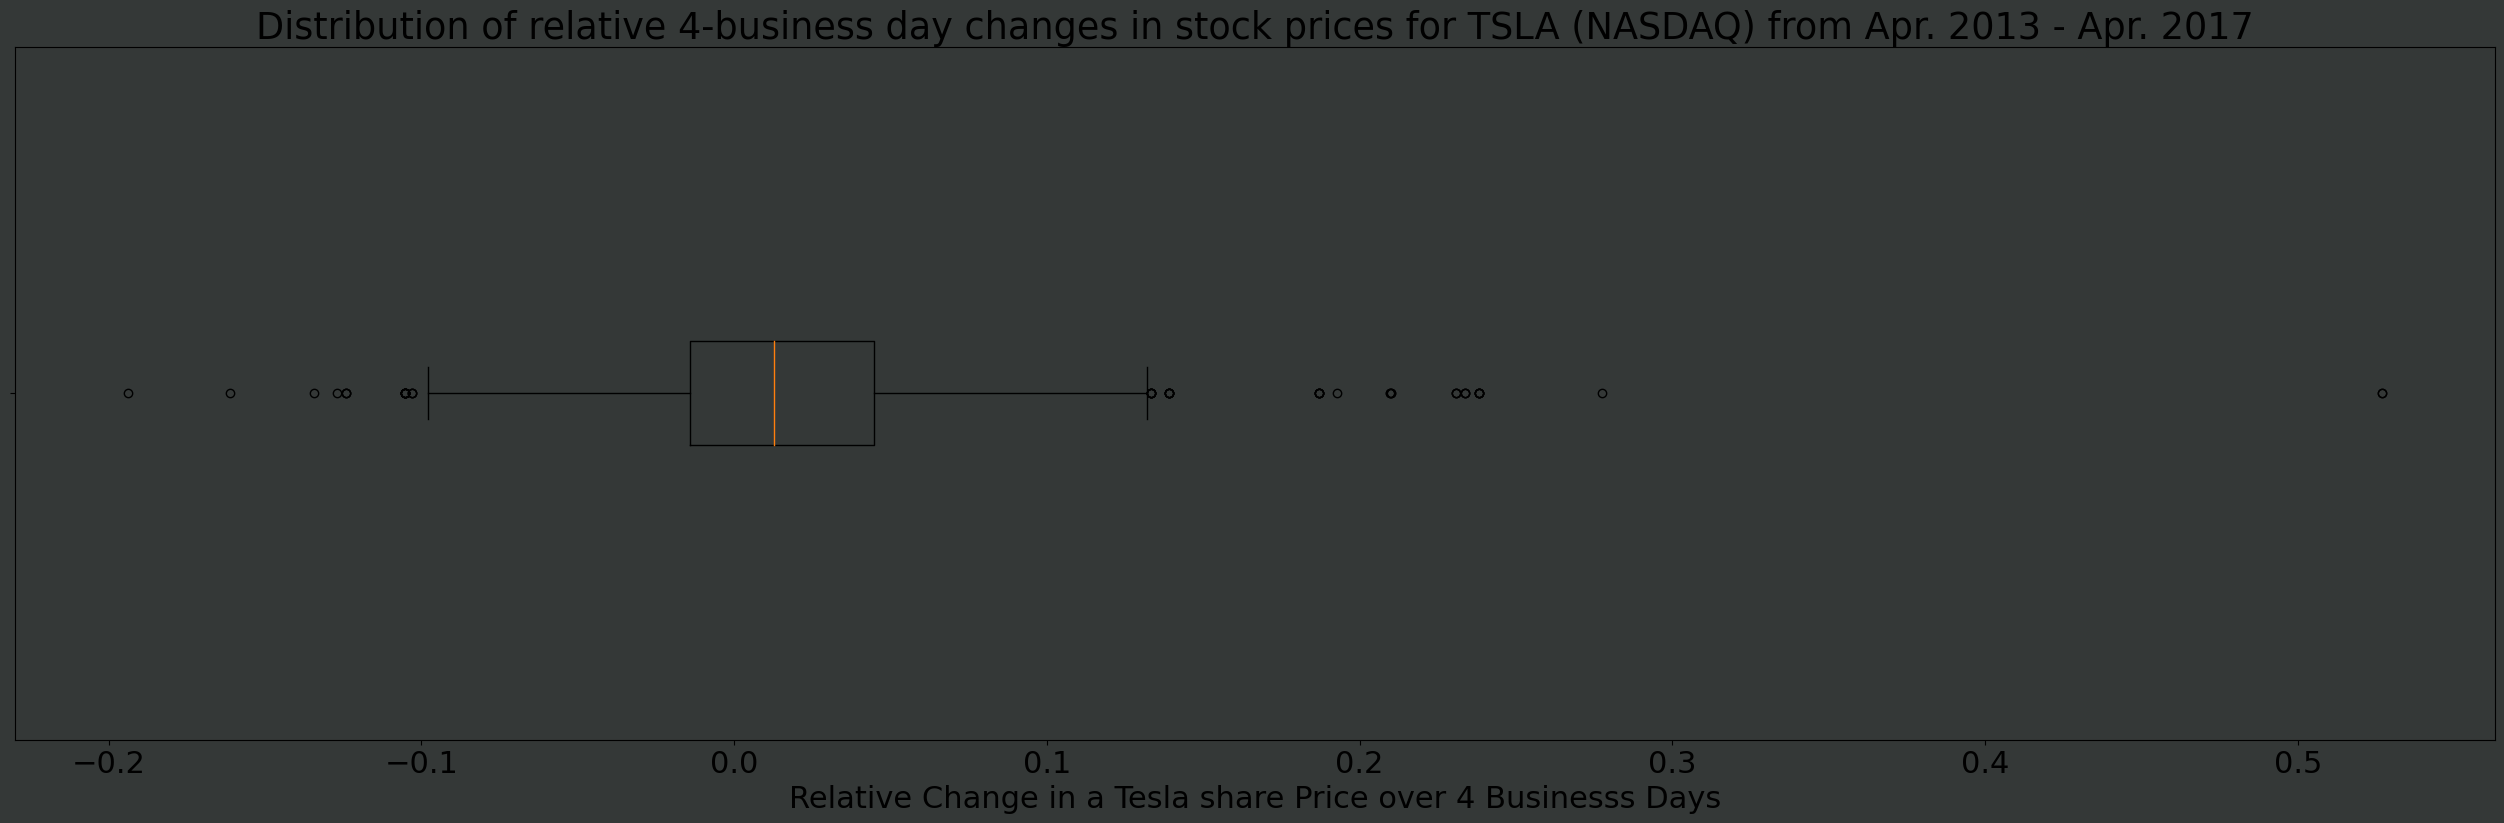

In [52]:
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.facecolor"] = 'xkcd:charcoal'
fig, ax = plt.subplots()
ax.boxplot(merged_df["next_four_days_relative_change"], vert=False, labels=[''])
ax.set_facecolor("xkcd:charcoal")
ax.set_xlabel("Relative Change in a Tesla share Price over 4 Businesss Days")
ax.set_title("Distribution of relative 4-business day changes in stock prices for TSLA (NASDAQ) from Apr. 2013 - Apr. 2017")
fig.set_size_inches(32,9)
plt.plot()

0.5269611040096001 b"Just want to say thanks to customers &amp; investors that took a chance on Tesla through the long, dark night. We wouldn't be here without you."
0.27745745050364706 b'Tesla wired the funds to repay the DOE loan today. Only US car company to have fully repaid govt http://t.co/jxHW9YkvPz'
0.23813901725013914 b'Am a fan of Larry, Sergey &amp; Google in general, but self-driving cars comments to Bloomberg were just off-the-cuff. No big announcement here'
0.23375842368714297 b'More importantly, @Chrysler failed to pay back $1.3B. Apart those 2 points, you were totally 1st http://t.co/0P2ZLDl67a'
0.23073444524246522 b'Anyone interested in doing ultra hardcore vehicle engineering at Tesla, please apply!'
0.21003128102746965 b"RT @TeslaMotors: Revenue expected to exceed guidance by 20% in Q4 2013 thanks to Model S' stellar safety record &amp; winter performance: http:\xe2\x80\xa6"
0.2097174020823004 b'However, F9 will continue to land in the ocean until we prove precision 

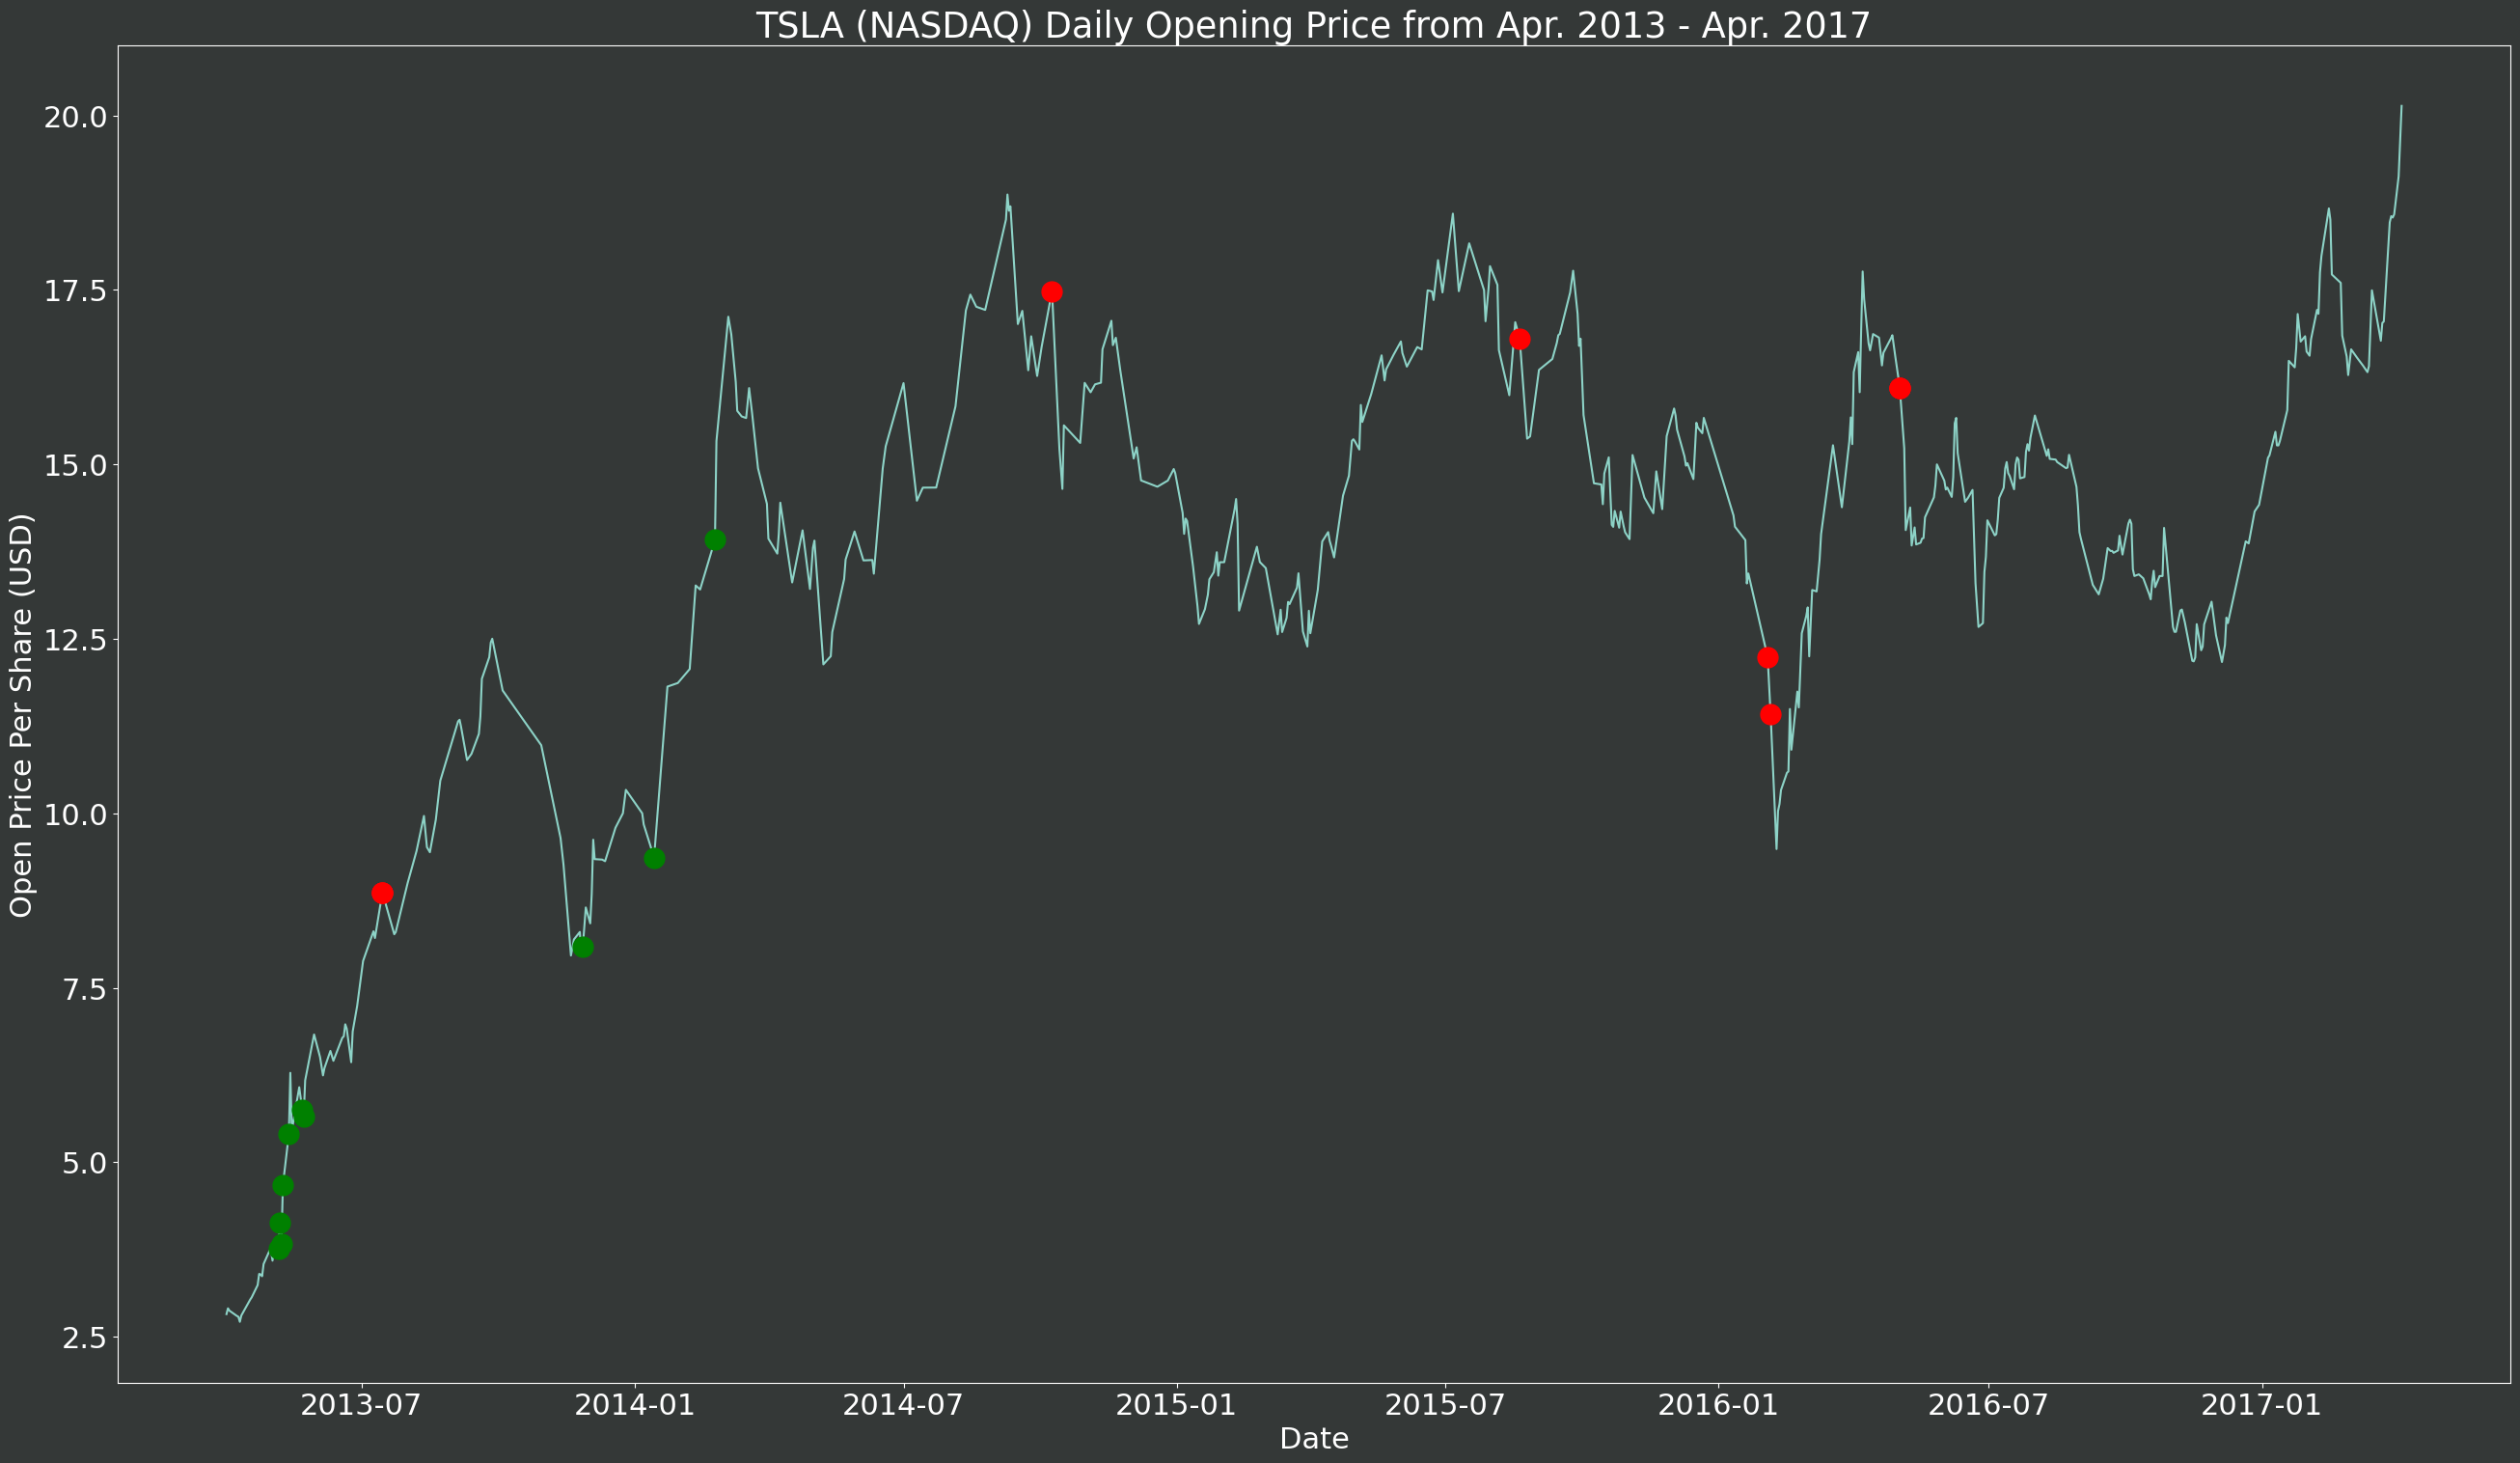

In [53]:
# Find tweets associated with most extreme stock changes
extreme_up_data = [[], []]
extreme_down_data = [[], []]
i = 0
while (len(extreme_up_data[0]) < 10):
    if not (merged_df[merged_df["next_four_days_relative_change"] == merged_df["next_four_days_relative_change"].nlargest(100).iloc[i]]['date'].iloc[0]) in extreme_up_data[0]:
        extreme_up_data[0].append(merged_df[merged_df["next_four_days_relative_change"] == merged_df["next_four_days_relative_change"].nlargest(100).iloc[i]]['date'].iloc[0])
        extreme_up_data[1].append(merged_df[merged_df["next_four_days_relative_change"] == merged_df["next_four_days_relative_change"].nlargest(100).iloc[i]]["Open"].str.replace('$', '', regex=True).astype(float).iloc[0])
        print (merged_df[merged_df["next_four_days_relative_change"] == merged_df["next_four_days_relative_change"].nlargest(100).iloc[i]]['next_four_days_relative_change'].iloc[0], merged_df[merged_df["next_four_days_relative_change"] == merged_df["next_four_days_relative_change"].nlargest(100).iloc[i]]['text'].iloc[0])
    i += 1

for i in range(10):
    extreme_down_data[0].append(merged_df[merged_df["next_four_days_relative_change"] == merged_df["next_four_days_relative_change"].nsmallest(10).iloc[i]]['date'].iloc[0])
    extreme_down_data[1].append(merged_df[merged_df["next_four_days_relative_change"] == merged_df["next_four_days_relative_change"].nsmallest(10).iloc[i]]["Open"].str.replace('$', '', regex=True).astype(float).iloc[0])
    print (merged_df[merged_df["next_four_days_relative_change"] == merged_df["next_four_days_relative_change"].nsmallest(100).iloc[i]]['next_four_days_relative_change'].iloc[0], merged_df[merged_df["next_four_days_relative_change"] == merged_df["next_four_days_relative_change"].nsmallest(100).iloc[i]]['text'].iloc[0])

# ## Create graph of Tesla stock price
plt.style.use('dark_background')
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.facecolor"] = 'xkcd:charcoal'
fig, ax = plt.subplots()

ax.plot(merged_df["date"], merged_df["Open"].str.replace('$', '', regex=True).astype(float))
ax.plot(extreme_up_data[0], extreme_up_data[1], marker='.', c='g', markersize=30, linestyle="None")
ax.plot(extreme_down_data[0], extreme_down_data[1], marker='.', c='r', markersize=30, linestyle="None")
ax.set_title("TSLA (NASDAQ) Daily Opening Price from Apr. 2013 - Apr. 2017")
ax.set_xlabel('Date')
ax.set_ylabel('Open Price Per Share (USD)')
fig.set_size_inches(32,18)
ax.set_facecolor('xkcd:charcoal')
plt.show()